## Test overview

In [14]:
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option("display.max_columns", None)

import numpy as np
import os
import matplotlib.pyplot as plt

import plotly.express as px 
import plotly.graph_objects as go
from src.data import mdl


In [2]:
df_runs = pd.read_csv('../data/raw/runs.csv', index_col=0)

In [3]:
df_runs.head()

,A0,ABULB,AI,AIX,AR,ARH,ASKEG,BKB,BKL,BKX,BR,BRA,BTT1,BWL,CFP,CP,CW,D,DCLR,HSKEG,IRUD,KXX,KZZ,Körfallstyp,LOA,LSKEG,NDES,PD,PDTDES,PROT,PTYPE,RH,RHBL,RR,RSKEG,RTYPE,SFP,TA,TF,TWIN,VDES,Volume,XRUD,XSKEG,angle1,angle2,ascii_name,beam,comment,date,facility,file_path_ascii,file_path_ascii_temp,file_path_hdf5,file_path_log,gm,kg,lcg,loading_condition_id,lpp,model_number,name,project_number,run_number,scale_factor,series_number,ship_name,ship_speed,ship_type_id,test_number,test_type,xm,ym,zm
22605,0.722775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.331311,1.253641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.206311,0.206311,NaN,NaN,0.441027,NaN,NaN,NaN,NaN,NaN,0.946602,12.0 kn,2020-09-18,MDL,NaN,NaN,\\sspa.local\lab\MeasuredataMDL\40199079\001\0...,NaN,0.136092,0.438908,-0.24432,167.0,5.014563,M5139-02-A,Design,40199079.0,1.0,41.2,1.0,M5139-02-A,0.96177,NaN,7.0,reference speed,0.0,0.0,-0.214
22606,0.722775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.331311,1.253641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.206311,0.206311,NaN,NaN,0.441027,NaN,NaN,NaN,NaN,NaN,0.946602,12.0 kn,2020-09-21,MDL,NaN,NaN,\\sspa.local\lab\MeasuredataMDL\40199079\001\0...,NaN,0.136092,0.438908,-0.24432,167.0,5.014563,M5139-02-A,Design,40199079.0,2.0,41.2,1.0,M5139-02-A,0.96177,NaN,7.0,reference speed,0.0,0.0,-0.214
22607,0.722775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.331311,1.253641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.206311,0.206311,NaN,NaN,0.441027,NaN,NaN,NaN,NaN,NaN,0.946602,12.0 kn,2020-09-22,MDL,NaN,NaN,\\sspa.local\lab\MeasuredataMDL\40199079\001\0...,NaN,0.136092,0.438908,-0.24432,167.0,5.014563,M5139-02-A,Design,40199079.0,3.0,41.2,1.0,M5139-02-A,0.96177,NaN,7.0,reference speed,0.0,0.0,-0.214
22608,0.722775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.331311,1.253641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.206311,0.206311,NaN,NaN,0.441027,NaN,NaN,NaN,NaN,NaN,0.946602,12.0 kn,2020-09-22,MDL,NaN,NaN,\\sspa.local\lab\MeasuredataMDL\40199079\001\0...,NaN,0.136092,0.438908,-0.24432,167.0,5.014563,M5139-02-A,Design,40199079.0,4.0,41.2,1.0,M5139-02-A,0.96177,NaN,7.0,reference speed,0.0,0.0,-0.214
22609,0.722775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.331311,1.253641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.206311,0.206311,NaN,NaN,0.441027,NaN,NaN,NaN,NaN,NaN,0.946602,12.0 kn,2020-09-22,MDL,NaN,NaN,\\sspa.local\lab\MeasuredataMDL\40199079\001\0...,NaN,0.136092,0.438908,-0.24432,167.0,5.014563,M5139-02-A,Design,40199079.0,5.0,41.2,1.0,M5139-02-A,0.96177,NaN,7.0,reference speed,0.0,0.0,-0.214


In [4]:
df_runs['series_number'].unique()

array([ 1.,  5., 10.])

In [21]:
df_runs['sailing'] = False
mask = df_runs['test_type']=='sailing'
df_runs.loc[mask,'sailing']=True
mask = df_runs['comment'].str.contains('GWA')
df_runs.loc[mask,'sailing']=True


In [22]:
df_runs.groupby(by=['test_type','comment']).first()['sailing']

test_type         comment              
reference speed   10.0 kn                  False
                  12.0 kn                  False
                  8.0 kn                   False
rodergrundvinkel  Rodergrundvinkel         False
sailing           Seglande 120deg           True
                  Seglande 55deg            True
                  Seglande GWA= -90deg      True
turning circle    Circle 35PS              False
                  Circle 35SB              False
zigzag            ZZ 10/10PS               False
                  ZZ 10/10PS - GWA= -90     True
                  ZZ 10/10SB               False
                  ZZ 10/10SB - GWA= -90     True
                  ZZ 20/20PS               False
                  ZZ 20/20PS - GWA= -90     True
                  ZZ 20/20SB               False
                  ZZ 20/20SB - GWA= -90     True
Name: sailing, dtype: bool

In [23]:
df_runs.to_csv('../data/raw/runs.csv')

In [5]:
df_runs['test_type'].unique()

array(['reference speed', 'rodergrundvinkel', 'zigzag', 'turning circle',
       'sailing'], dtype=object)

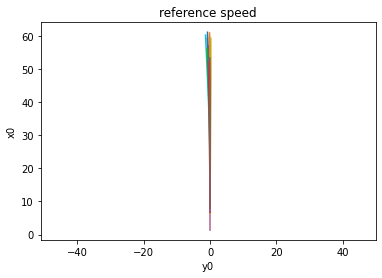

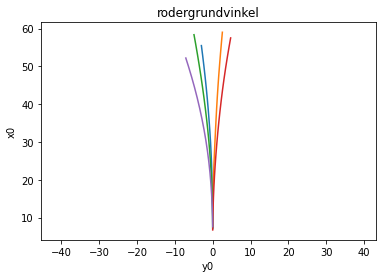

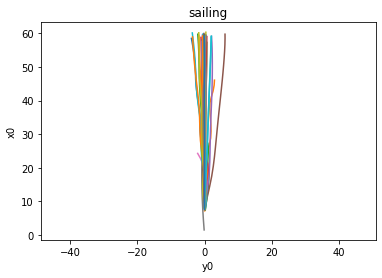

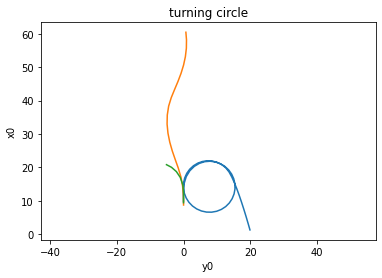

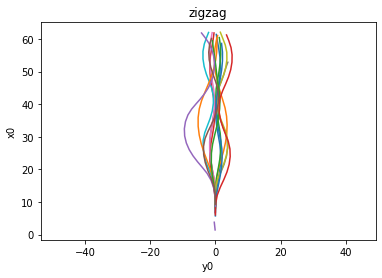

In [15]:
for test_type, group in df_runs.groupby(by=['test_type']):
    
    fig,ax=plt.subplots()
    ax.set_title(test_type)
    
    for id, row in group.iterrows():
        
        df = mdl.load_run(id=id)
        df = df.resample('3S').mean()        
        
        df.plot(x='y0', y='x0', ax=ax)
        
    ax.get_legend().set_visible(False)
    ax.axis('equal')
    ax.set_ylabel('x0')


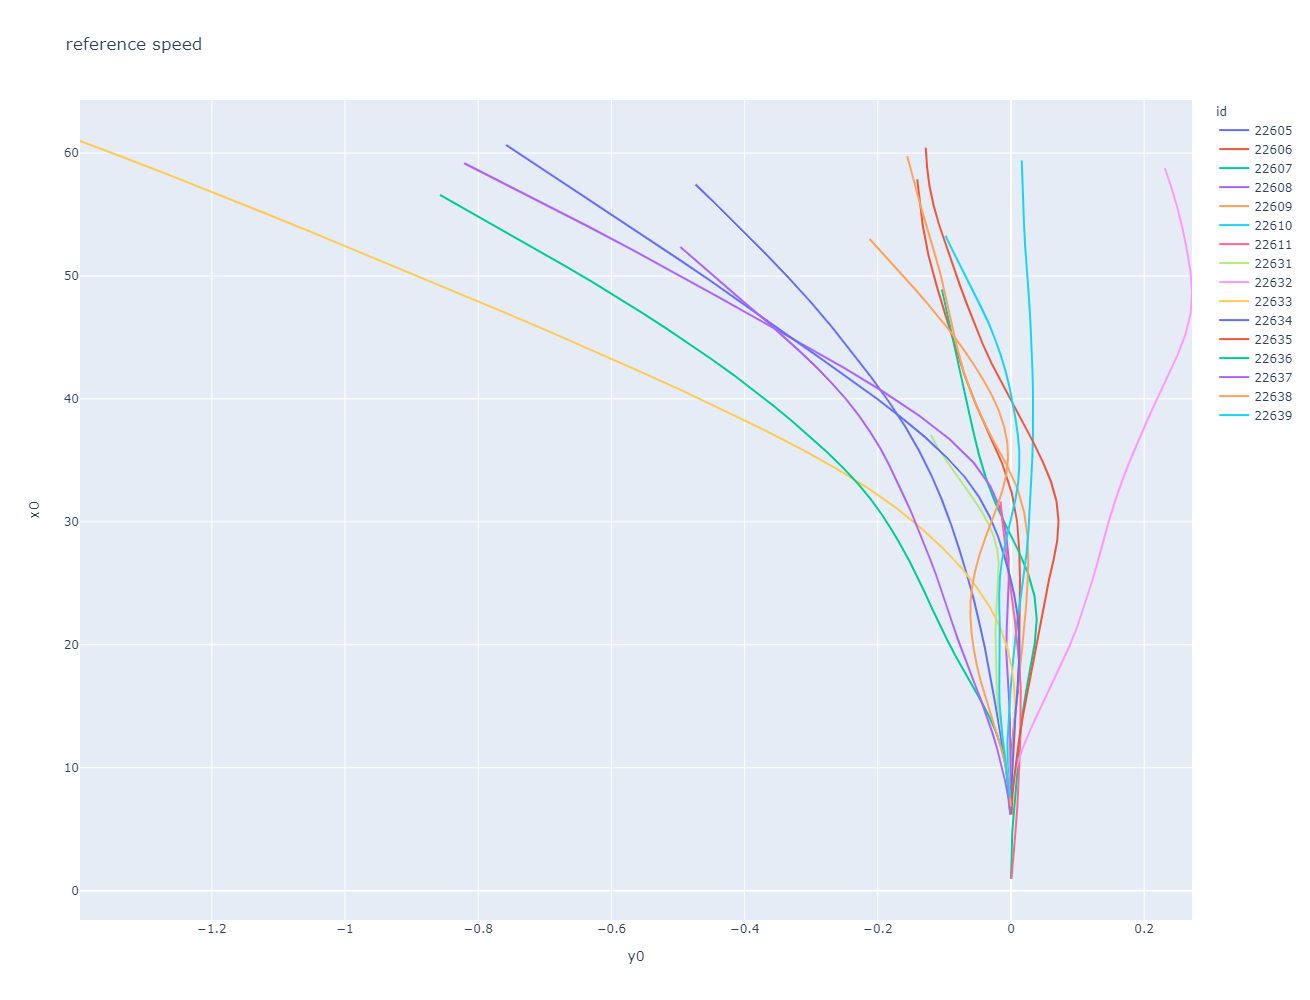

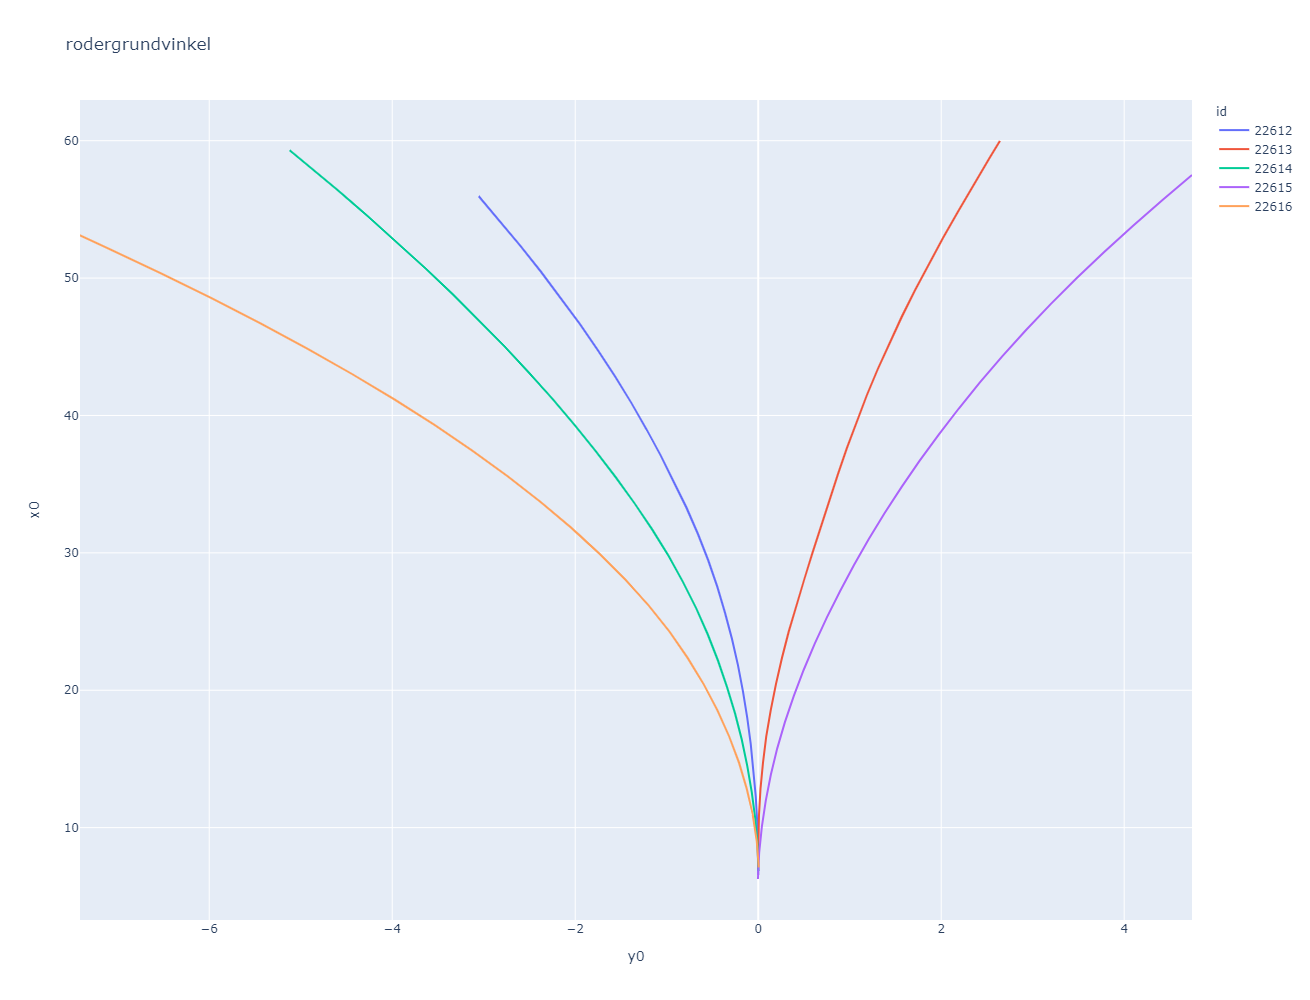

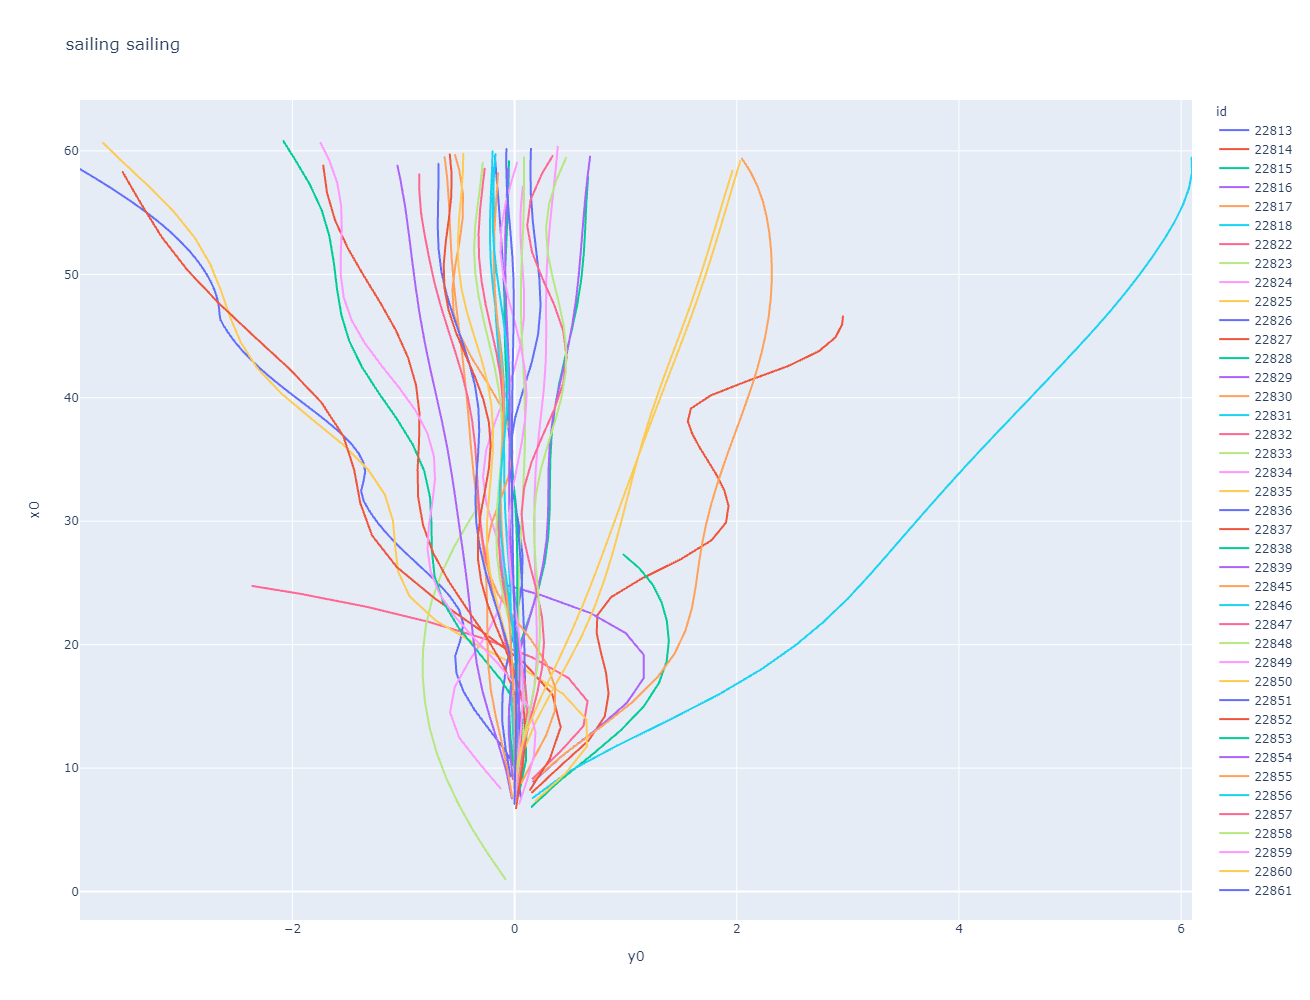

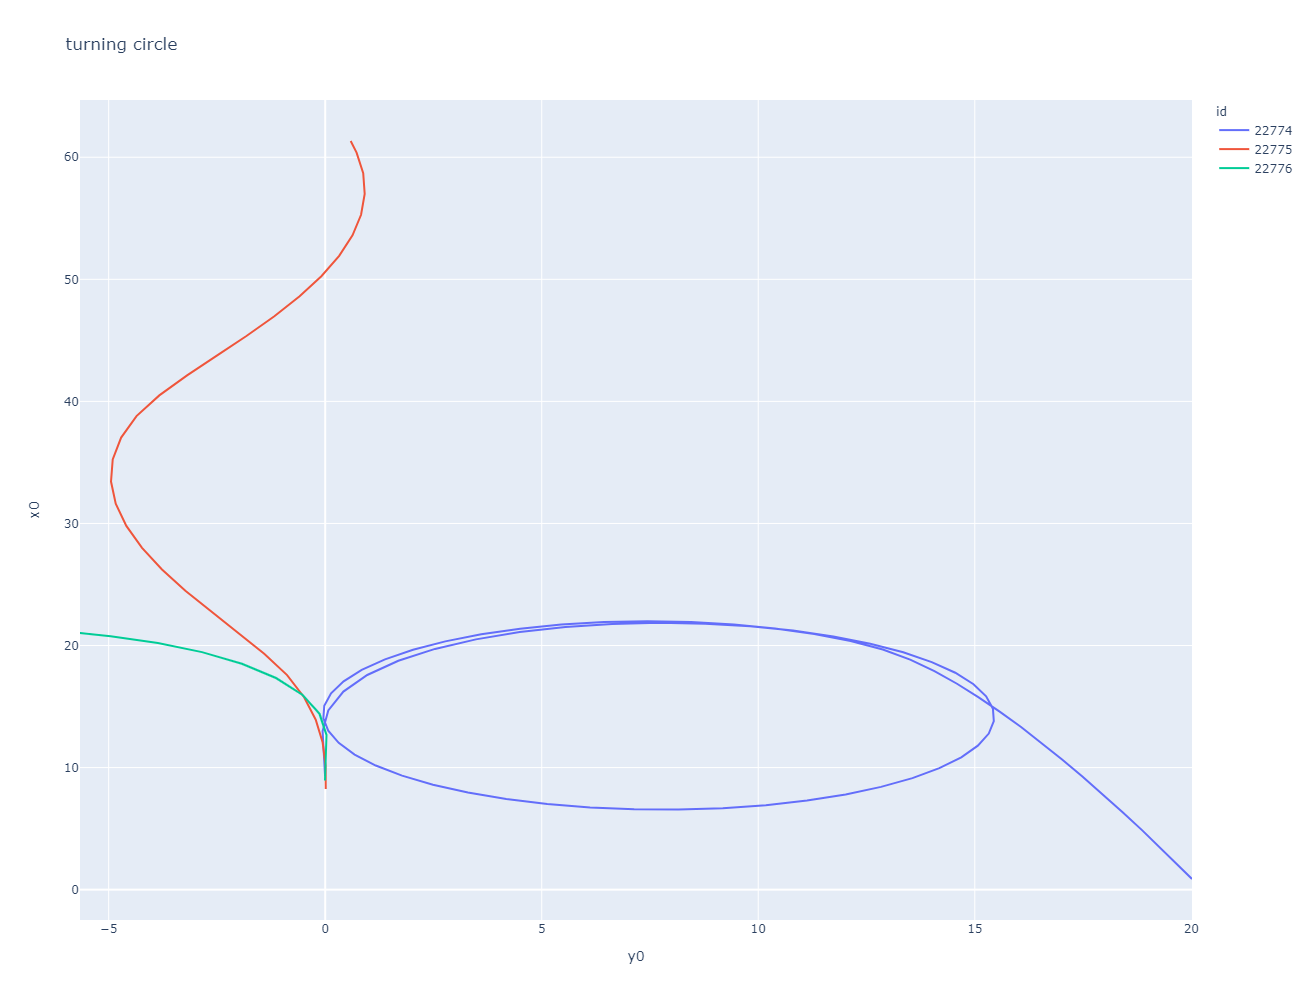

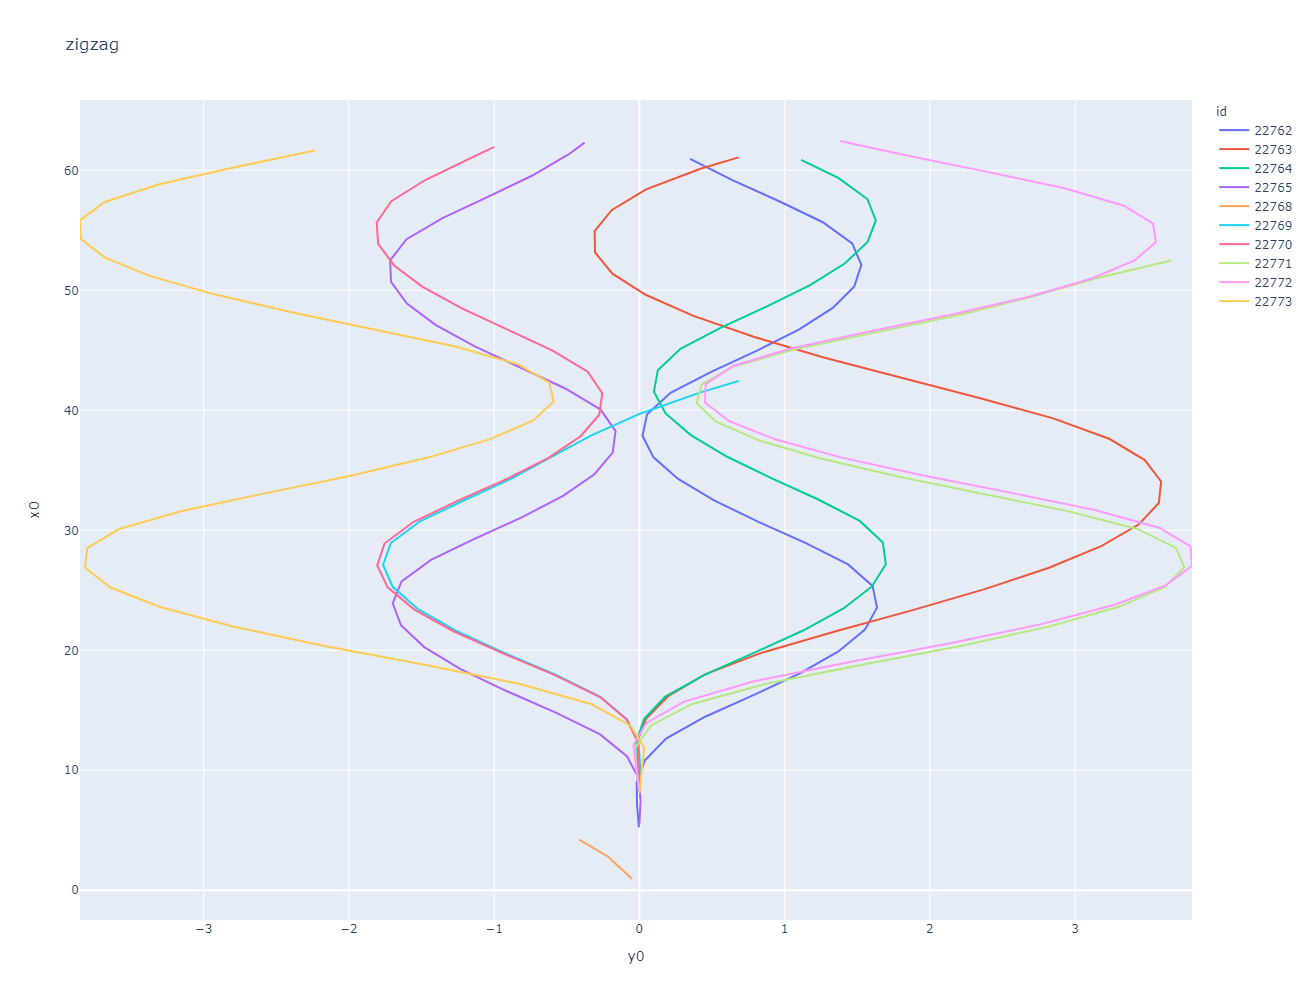

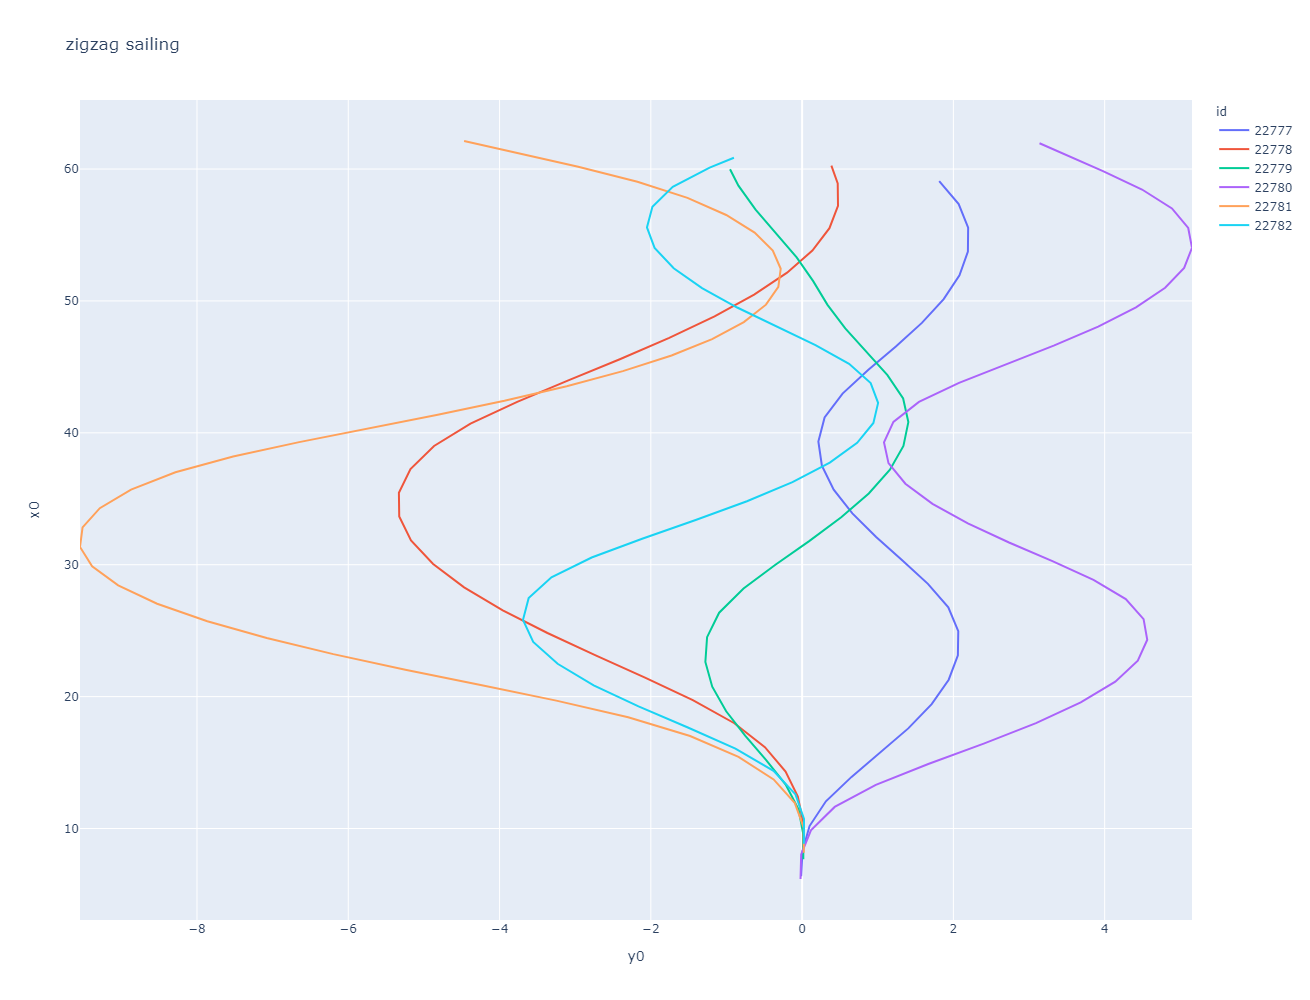

In [24]:
for (test_type,sailing), group in df_runs.groupby(by=['test_type','sailing']):
    
    data = pd.DataFrame()
    
    for id, row in group.iterrows():
        
        df = mdl.load_run(id=id)
        df = df.resample('2S').mean()        
        df['id'] = id    
        df['comment'] = row['comment']
                
        data = data.append(df)
    
    title = test_type
    if sailing:
        title+=' sailing'
    
    display(px.line(data, x='y0', y='x0', width=1000, height=1000, line_group='id', color='id', title=title, hover_data=['comment']))